In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
!pip install xlrd

In [3]:
train_df = pd.read_csv("cs-training.csv", index_col=0) 
test_df  = pd.read_csv("cs-test.csv", index_col=0)
submission = pd.read_csv('sampleEntry.csv')
data_description = pd.read_excel("Data Dictionary.xls", header=1)

In [4]:
train_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [6]:
train_df.shape

(150000, 11)

In [9]:
train_df.info()  #prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [11]:
train_df.describe()  #generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [13]:
train_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [16]:
train_df.nunique()  #returns the number of unique values for each column.

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

In [5]:
test_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [7]:
test_df.shape

(101503, 11)

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

In [12]:
test_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [14]:
test_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [17]:
test_df.nunique() 

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines    85716
age                                        82
NumberOfTime30-59DaysPastDueNotWorse       16
DebtRatio                               79878
MonthlyIncome                           11976
NumberOfOpenCreditLinesAndLoans            56
NumberOfTimes90DaysLate                    18
NumberRealEstateLoansOrLines               24
NumberOfTime60-89DaysPastDueNotWorse       12
NumberOfDependents                         13
dtype: int64

In [18]:
pd.DataFrame({'count':train_df.isnull().sum().values, 'ratio': train_df.isnull().mean()*100})

,count,ratio
SeriousDlqin2yrs,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,29731,19.820667
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


In [19]:
pd.DataFrame({'count':test_df.isnull().sum().values, 'ratio': test_df.isnull().mean()*100})

,count,ratio
SeriousDlqin2yrs,101503,100.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,20103,19.805326
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


In [20]:
train_df['SeriousDlqin2yrs'].value_counts()/train_df.shape[0]

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

C:\Users\pierre\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'SeriousDlqin2yrs'}, ylabel='SeriousDlqin2yrs'>

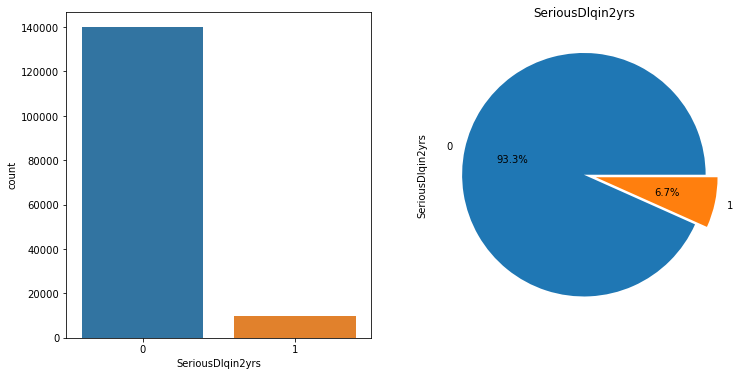

In [22]:
target_count = train_df["SeriousDlqin2yrs"].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sb.countplot("SeriousDlqin2yrs", data=train_df, ax=axes[0])

axes[1].set_title("SeriousDlqin2yrs")
target_count.plot.pie(explode=[0, 0.1], autopct='%1.1f%%',ax=axes[1])

<AxesSubplot:>

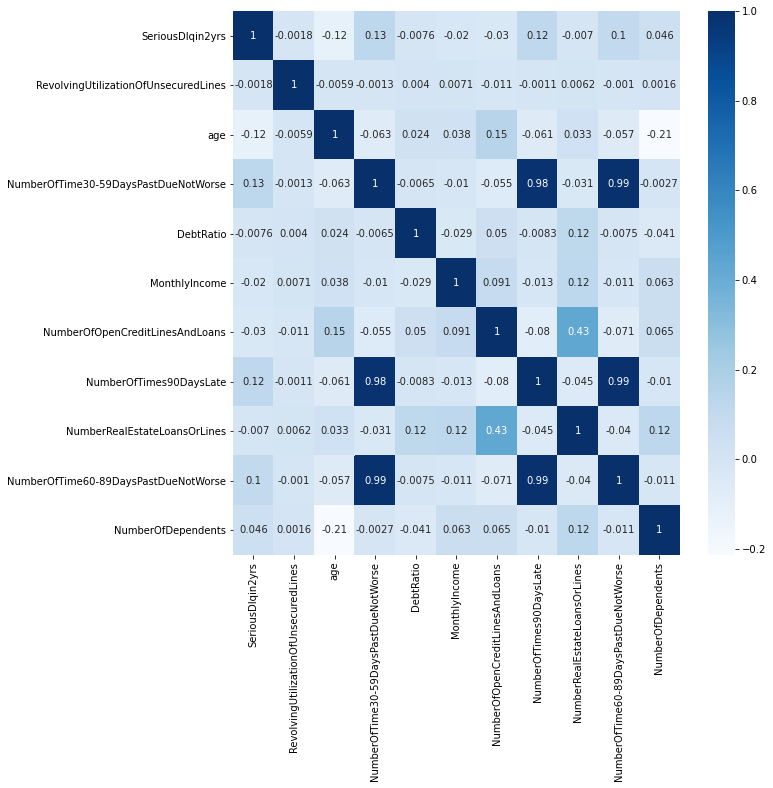

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(train_df.corr(), annot=True, cmap="Blues", ax=ax)

Text(0, 0.5, 'Total')

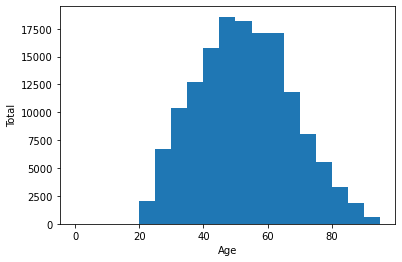

In [24]:
age_bins = [e for e in range(0, 100,5)]

plt.hist(train_df["age"], bins=age_bins)
plt.xlabel('Age')
plt.ylabel('Total')

In [26]:
def remove_outliers(df,attribute_name,max_scale_from_std):
    f = df[attribute_name]
    std = f.std()
    distance_from_mean = f-f.mean()
    condition = np.abs(distance_from_mean) >= max_scale_from_std * std
    df.loc[condition,attribute_name] = f.mean()
    return df

Text(0.5, 0, 'After')

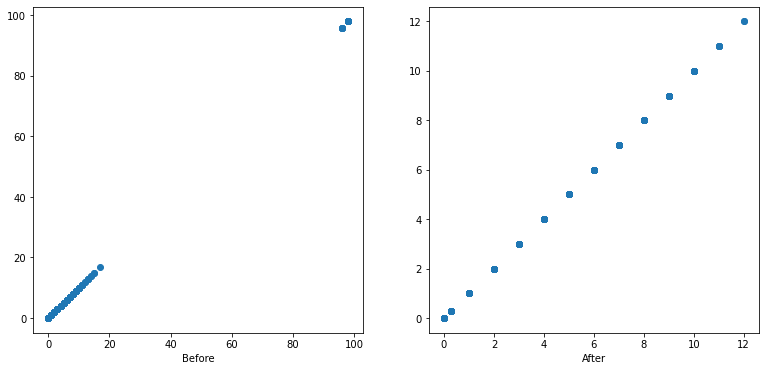

In [27]:
first_attribute = train_df['NumberOfTimes90DaysLate']

fig, axes = plt.subplots(1,2, figsize=(13,6))
axes[0].scatter(first_attribute, first_attribute)
axes[0].set_xlabel("Before")

train_df = remove_outliers(train_df, "NumberOfTimes90DaysLate",3)
first_attribute = train_df["NumberOfTimes90DaysLate"]
axes[1].scatter(first_attribute, first_attribute)
axes[1].set_xlabel("After")

Text(0.5, 0, 'After')

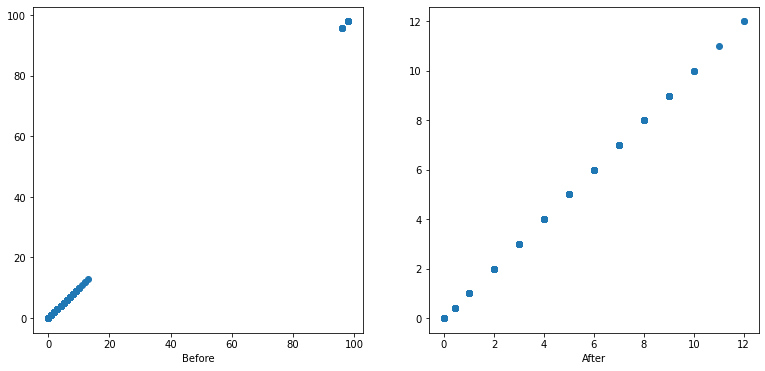

In [29]:
second_attribute = train_df['NumberOfTime30-59DaysPastDueNotWorse']

fig, axes = plt.subplots(1,2, figsize=(13,6))
axes[0].scatter(second_attribute, second_attribute)
axes[0].set_xlabel("Before")

train_df = remove_outliers(train_df, "NumberOfTime30-59DaysPastDueNotWorse",3)
second_attribute = train_df["NumberOfTime30-59DaysPastDueNotWorse"]
axes[1].scatter(second_attribute, second_attribute)
axes[1].set_xlabel("After")

Text(0.5, 0, 'After')

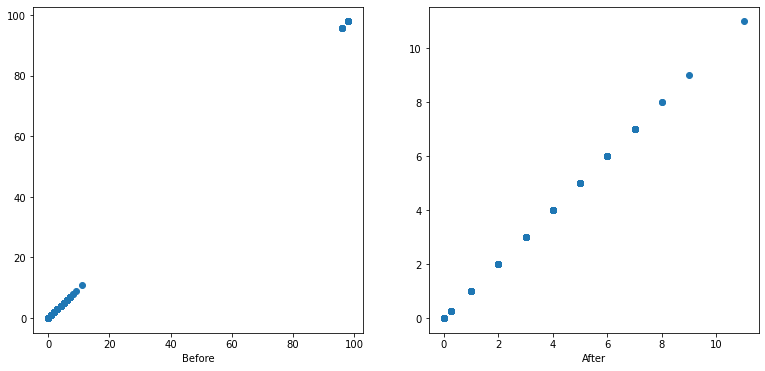

In [31]:
third_attribute = train_df['NumberOfTime60-89DaysPastDueNotWorse']

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0].scatter(third_attribute, third_attribute)
axes[0].set_xlabel("Before")

train_df = remove_outliers(train_df, "NumberOfTime60-89DaysPastDueNotWorse", 3)
third_attribute = train_df["NumberOfTime60-89DaysPastDueNotWorse"]
axes[1].scatter(third_attribute, third_attribute)
axes[1].set_xlabel("After")

C:\Users\pierre\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierre\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

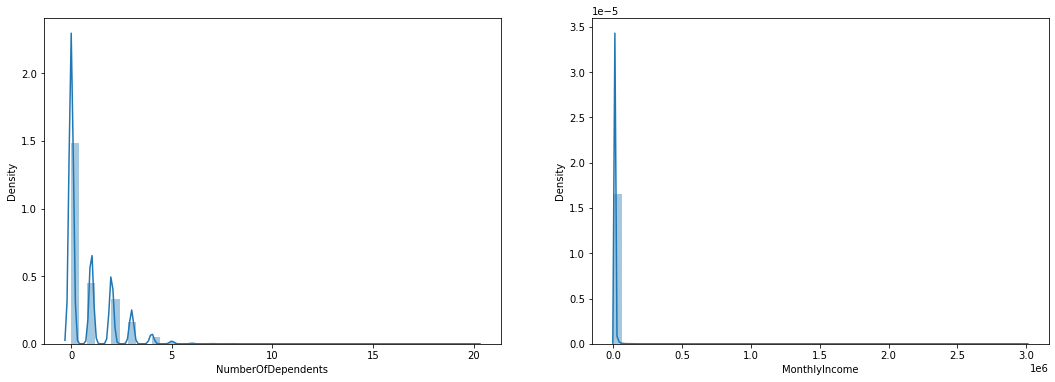

In [32]:
fig, ax = plt.subplots(figsize=(18,6), ncols=2)
sb.distplot(train_df["NumberOfDependents"],ax=ax[0])
sb.distplot(train_df["MonthlyIncome"],ax=ax[1])

In [33]:
number_of_dependents_train = train_df["NumberOfDependents"]
number_of_dependents_train_mean = number_of_dependents_train.mean()
number_of_dependents_train_median = number_of_dependents_train.median()
number_of_dependents_train_mode = number_of_dependents_train.mode().mean()

monthly_income_train = train_df["MonthlyIncome"]
monthly_income_train_mean = monthly_income_train.mean()
monthly_income_train_median = monthly_income_train.median()
monthly_income_train_mode = monthly_income_train.mode().mean()

print("Data Training")
print("Number Of Dependents")
print("Mean NOD:", number_of_dependents_train_mean)
print("Median NOD:", number_of_dependents_train_median)
print("Mod Mean NOD:", number_of_dependents_train_mode)

print("Monthly Income")
print("Mean MI:", monthly_income_train_mean)
print("Median MI:", monthly_income_train_median)
print("Mod Mean MI:", monthly_income_train_mode)

Data Training
Number Of Dependents
Mean NOD: 0.7572222678605657
Median NOD: 0.0
Mod Mean NOD: 0.0
Monthly Income
Mean MI: 6670.221237392844
Median MI: 5400.0
Mod Mean MI: 5000.0


C:\Users\pierre\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierre\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

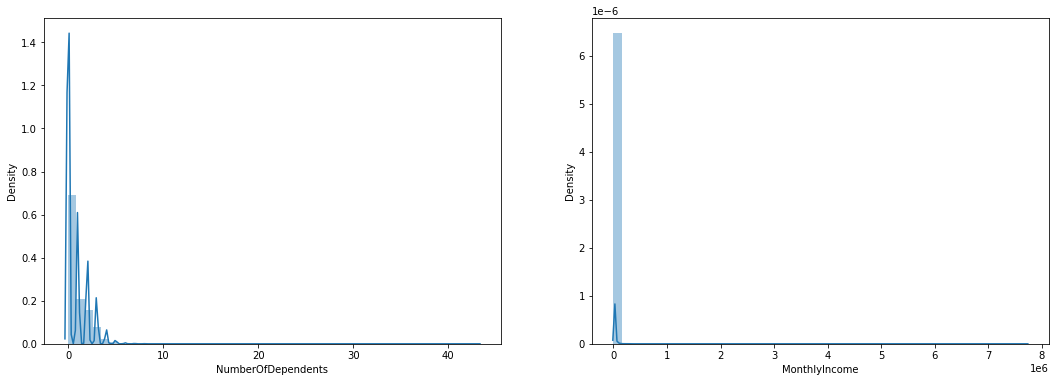

In [34]:
fig, ax = plt.subplots(figsize=(18,6), ncols=2)
sb.distplot(test_df["NumberOfDependents"],ax=ax[0])
sb.distplot(test_df["MonthlyIncome"],ax=ax[1])

In [35]:
number_of_dependents_test = test_df["NumberOfDependents"]
number_of_dependents_test_mean = number_of_dependents_test.mean()
number_of_dependents_test_median = number_of_dependents_test.median()
number_of_dependents_test_mode = number_of_dependents_test.mode().mean()

monthly_income_test = test_df["MonthlyIncome"]
monthly_income_test_mean = monthly_income_test.mean()
monthly_income_test_median = monthly_income_test.median()
monthly_income_test_mode = monthly_income_test.mode().mean()

print("Data Testing")
print("Number Of Dependents")
print("Mean NOD:", number_of_dependents_test_mean)
print("Median NOD:", number_of_dependents_test_median)
print("Mod Mean NOD:", number_of_dependents_test_mode)

print("Monthly Income")
print("Mean MI:", monthly_income_test_mean)
print("Median MI:", monthly_income_test_median)
print("Mod Mean MI:", monthly_income_test_mode)

Data Testing
Number Of Dependents
Mean NOD: 0.7690463909705998
Median NOD: 0.0
Mod Mean NOD: 0.0
Monthly Income
Mean MI: 6855.0355896805895
Median MI: 5400.0
Mod Mean MI: 5000.0


In [36]:
train_df['NumberOfDependents'].fillna(number_of_dependents_train_mode, inplace=True)
train_df['MonthlyIncome'].fillna(monthly_income_train_mode, inplace=True)

test_df['NumberOfDependents'].fillna(number_of_dependents_test_mode, inplace=True)
test_df['MonthlyIncome'].fillna(monthly_income_test_mode, inplace=True)

In [37]:
train_df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [38]:
test_df.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

In [39]:
x = train_df.drop("SeriousDlqin2yrs", axis=1)
y = train_df["SeriousDlqin2yrs"]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 1   age                                   150000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 3   DebtRatio                             150000 non-null  float64
 4   MonthlyIncome                         150000 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 6   NumberOfTimes90DaysLate               150000 non-null  float64
 7   NumberRealEstateLoansOrLines          150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  float64
 9   NumberOfDependents                    150000 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 16.6 MB


In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier

parameter = {
    'n_estimators': [9,27,36],
    'max_depth': [3,7,9],
    'min_samples_leaf': [2, 4]
}

rf = RandomForestClassifier()

In [42]:
from sklearn.model_selection import RandomizedSearchCV

random_forest_search = RandomizedSearchCV(rf, param_distributions=parameter, cv=5)

In [43]:
random_forest_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 7, 9],
                                        'min_samples_leaf': [2, 4],
                                        'n_estimators': [9, 27, 36]})

In [44]:
best_estimator_rf = random_forest_search.best_estimator_
best_estimator_rf

RandomForestClassifier(max_depth=9, min_samples_leaf=4, n_estimators=27)

In [45]:
print("training accuracy: {:.2f}".format(random_forest_search.score(x_train, y_train) * 100))
print("validation accuracy: {:.2f}".format(random_forest_search.score(x_test, y_test) * 100))

training accuracy: 94.32
validation accuracy: 93.75


In [47]:
!pip install lightgbm

In [48]:
from lightgbm import LGBMClassifier

parameter = {
    'n_estimators': [100, 250],
    'max_depth': [8, 24],
    'num_leaves': [25, 50],
    'first_metric_only': [True]
}


lgb = LGBMClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
    estimator=lgb,
    param_grid=parameter,
    cv=5,
)

lgbm_fit = gs.fit(x_train, y_train)

In [50]:
print(lgbm_fit.best_score_)
print(lgbm_fit.best_params_)

0.9368000000000001
{'first_metric_only': True, 'max_depth': 24, 'n_estimators': 100, 'num_leaves': 25}


In [51]:
print("training accuracy: {:.2f}".format(gs.score(x_train, y_train) * 100))
print("validation accuracy: {:.2f}".format(gs.score(x_test, y_test) * 100))

training accuracy: 94.11
validation accuracy: 93.72


In [52]:
from sklearn.linear_model import LogisticRegression

parameter = {
    'solver': ['newton-cg', 'lbfgs'],
    'penalty': ['l2', 'elasticnet'],
    'C': [ 1e-1, 1],
}

lr = LogisticRegression()

In [53]:
%%capture --no-display

gs_lr = GridSearchCV(
    estimator=lr,
    param_grid=parameter,
    cv=5,
)

lr_fit = gs_lr.fit(x_train, y_train)

In [54]:
print(lr_fit.best_score_)
print(lr_fit.best_params_)

0.935695238095238
{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [55]:
print("training accuracy: {:.2f}".format(gs_lr.score(x_train, y_train) * 100))
print("validation accuracy: {:.2f}".format(gs_lr.score(x_test, y_test) * 100))

training accuracy: 93.58
validation accuracy: 93.74


In [56]:
continous_proba = lgbm_fit.best_estimator_.predict_proba(x_test)

proba = continous_proba[:, 1]
proba[proba >= 0.5] = 1
proba[proba < 0.5] = 0
proba = proba.astype(int)

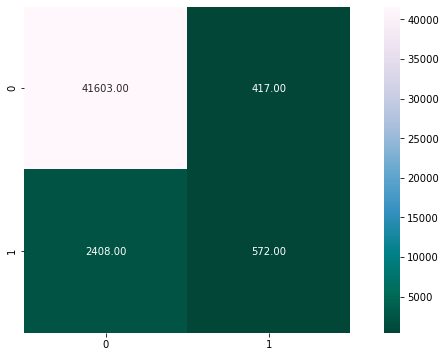

In [58]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, proba) # kita akan mengambil probabilitas keluar angka 1

plt.figure(figsize=(12, 6))

sb.heatmap(matrix, annot=True, fmt=".2f", square=True, cmap="PuBuGn_r")
plt.show()

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, proba))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42020
           1       0.58      0.19      0.29      2980

    accuracy                           0.94     45000
   macro avg       0.76      0.59      0.63     45000
weighted avg       0.92      0.94      0.92     45000



In [60]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, proba)

0.591011231468556

Text(0.5, 1.0, 'ROC')

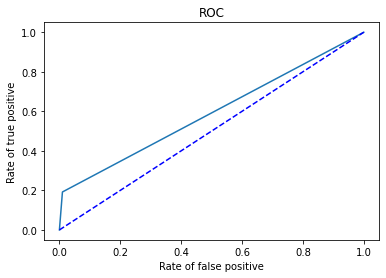

In [61]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, continous_proba[:, 1])
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'b')
plt.xlabel('Rate of false positive')
plt.ylabel('Rate of true positive')
plt.title('ROC')

In [62]:
submission.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [63]:
x = test_df.drop(["SeriousDlqin2yrs"], axis=1)
y = lgbm_fit.predict_proba(x)[:, 1]
ids = x.index.values

In [64]:
predicted = pd.DataFrame({'Id': ids, 'Probability': y})
predicted.to_csv("submission.csv", index=False)

In [65]:
predicted.head()

,Id,Probability
0,1,0.075494
1,2,0.066593
2,3,0.012522
3,4,0.077347
4,5,0.096071
